<img src = "logo_lapage.png" style = "height:75">

<center><h1><span style = "color:indianred"> Analyse des ventes de librairie</span></h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('customers.csv')
product = pd.read_csv('products.csv')
transaction = pd.read_csv('transactions.csv')

<h2><span style = 'color:indianred'>1. Aperçu et recherche des valeurs à nettoyer</span></h2>

### Données clients

In [3]:
# Aperçu des données

display(customer.head())
customer.info()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# Vérification des doublons

customer.duplicated().sum()

0

In [5]:
# Résumé des données numériques

customer.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [6]:
# Modalité de la variable sex

customer.sex.value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [7]:
# Modalité de la variable client_id

customer.client_id.sort_values()

4299       c_1
6894      c_10
2137     c_100
8472    c_1000
3426    c_1001
         ...  
94       c_997
2145     c_998
7358     c_999
2735      ct_0
8494      ct_1
Name: client_id, Length: 8623, dtype: object

In [8]:
# Verification de client_id particulier

customer[customer.client_id.isin(['ct_0','ct_1'])]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


### Données produits

In [9]:
# Aperçu des données

display(product.head())
product.info()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
# Vérification des doublons

product.duplicated().sum()

0

In [11]:
# Résumé des données numériques

product.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [12]:
# Vérification des produits à prix négatif

product[product.price < 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [13]:
# Modalités de 'categ'

product.categ.value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [14]:
# Modalités de 'id_prod'

product.id_prod.sort_values()

1001       0_0
803        0_1
2691      0_10
663      0_100
922     0_1000
         ...  
2576      2_96
2698      2_97
3088      2_98
3188      2_99
731        T_0
Name: id_prod, Length: 3287, dtype: object

In [15]:
product[product.id_prod.isin(['T_0'])]

,id_prod,price,categ
731,T_0,-1.0,0


### Données transactions

In [16]:
# Aperçu des données

display(transaction.head())
transaction.info()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [17]:
# Vérification des doublons

transaction.duplicated().sum()

126

In [18]:
# Affichage des doublons

transaction[transaction.duplicated(keep=False)]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [19]:
# Affichage des doublons en ordre de date

transaction[transaction.duplicated(keep=False)].sort_values('date')

,id_prod,date,session_id,client_id
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
91133,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
548383,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
453857,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
606326,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
...,...,...,...,...
312697,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
621687,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0


In [20]:
# Suppression des doublons

transaction = transaction.drop_duplicates(keep='first')

In [21]:
# Modalités de 'id_prod'

transaction.id_prod.sort_values()

568104    0_0
31591     0_0
10243     0_0
666045    0_0
109568    0_0
         ... 
577324    T_0
260133    T_0
201530    T_0
259417    T_0
392443    T_0
Name: id_prod, Length: 679406, dtype: object

In [22]:
# Transaction ayant 'T_0' pour 'id_prod'

transaction[transaction.id_prod.isin(['T_0'])]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


In [23]:
# Différents session_id de transaction ayant 'T_0' pour 'id_prod'

transaction[transaction.id_prod.isin(['T_0'])].session_id.value_counts()

s_0    74
Name: session_id, dtype: int64

In [24]:
transaction[transaction.id_prod.isin(['T_0'])].client_id.value_counts()

ct_0    37
ct_1    37
Name: client_id, dtype: int64

In [25]:
# Modalité de variable date

transaction['date'].value_counts()

test_2021-03-01 02:30:02.237449    2
test_2021-03-01 02:30:02.237430    2
test_2021-03-01 02:30:02.237428    2
test_2021-03-01 02:30:02.237424    2
test_2021-03-01 02:30:02.237414    2
                                  ..
2022-07-14 13:51:26.533057         1
2021-05-09 01:09:02.838161         1
2021-09-30 09:55:27.316636         1
2022-03-11 05:15:56.434468         1
2022-09-28 01:12:01.973763         1
Name: date, Length: 679371, dtype: int64

<h2><span style = 'color:indianred'>2. Nettoyage des données</span></h2>

### Données clients

In [26]:
# Les columes des données clients

customer.columns

Index(['client_id', 'sex', 'birth'], dtype='object')

In [27]:
# Suppression des données ayant id_client 'ct_0', 'ct_1'

customer = customer.drop(customer[customer.client_id.isin(['ct_0','ct_1'])].index)

In [28]:
# Verification de suppression

customer.client_id.sort_values()

4299       c_1
6894      c_10
2137     c_100
8472    c_1000
3426    c_1001
         ...  
7004     c_995
2788     c_996
94       c_997
2145     c_998
7358     c_999
Name: client_id, Length: 8621, dtype: object

### Données produits

In [29]:
# Les columes des données produits

product.columns

Index(['id_prod', 'price', 'categ'], dtype='object')

In [30]:
# Suppression des données ayant id_prod 'T_0'

product = product.drop(product[product.id_prod.isin(['T_0'])].index)

In [31]:
# Vérification de suppression

product.id_prod.isin(['T_0']).sum()

0

In [32]:
# Vérification s'il reste des produits à prix négatif

sum(product.price < 0)

0

### Données transactions

In [33]:
# Les columes des données produits

transaction.columns

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')

In [34]:
# Suppression des données ayant id_prod 'T_0'

transaction = transaction.drop(transaction[transaction.id_prod.isin(['T_0'])].index)

In [35]:
# Vérification de suppression

transaction.id_prod.isin(['T_0']).sum()

0

In [36]:
# Vérification s'il reste des transactions avec session_id 's_0'

transaction.session_id.isin(['s_0']).sum()

0

In [37]:
# Vérification s'il reste des transactions avec client_id 'ct_0' et 'ct_1'

transaction.client_id.isin(['ct_0','ct_1']).sum()

0

In [38]:
# Changement de type de la variable 'date'

transaction['date'] = pd.to_datetime(transaction.date, format='%Y-%m-%d %H:%M:%S.%f')

In [39]:
# Aperçu des données

transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


<h2><span style = 'color:indianred'>3. Analyse des indicateurs de vente</span></h2>

### Création de table transaction - produit

In [40]:
transaction.shape, product.shape

((679332, 4), (3286, 3))

In [41]:
# Fusion de table transaction et produit

transaction_product = pd.merge(transaction, product, on = 'id_prod', how = "left")
transaction_product.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [42]:
transaction_product.shape

(679332, 6)

In [43]:
# Information de table créée

transaction_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.3+ MB


In [44]:
# Vérification des valeurs manquantes

transaction_product[transaction_product['price'].isna()]

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN
...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN


In [45]:
# id_prod des produits avec valeurs manquantes

transaction_product[transaction_product['price'].isna()].groupby('id_prod').count()

,date,session_id,client_id,price,categ
id_prod,,,,,
0_2245,221,221,221,0,0


In [46]:
# Vérification de produit '0_2245' dans la liste des produits

product[product.id_prod == '0_2245']

,id_prod,price,categ


In [47]:
# Remplacement des valeurs manquantes

moyen_categ_0 = round(transaction_product[transaction_product.categ == 0].price.mean(),2)

transaction_product.loc[transaction_product[transaction_product.id_prod == '0_2245'].index, 'price'] = moyen_categ_0
transaction_product.loc[transaction_product[transaction_product.id_prod == '0_2245'].index, 'categ'] = 0

transaction_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 52.4+ MB


### Indicateurs chiffre d'affaires

In [48]:
# Aperçu des données

transaction_product.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [49]:
# Chiffre d'affaire global

ca_total = int(transaction_product.price.sum())

print("Le chiffre d'affaires global des ventes en ligne des deux dernières années est de {} euros"
      .format(ca_total))

Le chiffre d'affaires global des ventes en ligne des deux dernières années est de 11856080 euros


In [50]:
# Chiffre d'affaires annuels

import datetime

sales_year = transaction_product[['date','price']].groupby(pd.Grouper(key = 'date', freq = "m")).sum('price').reset_index()
sales_year['year'] = pd.cut(sales_year.date, labels = ['2021-2022', '2022-2023'],
                            bins = [datetime.datetime.strptime("2021-02-28", "%Y-%m-%d"),
                                    datetime.datetime.strptime("2022-02-28", "%Y-%m-%d"),
                                    datetime.datetime.strptime("2023-02-28", "%Y-%m-%d")])
sales_year = sales_year[['year', 'price']].groupby('year').sum('price').reset_index()
sales_year.head()

,year,price
0,2021-2022,5832832.97
1,2022-2023,6023247.15


<div class = 'alert alert-info'> 
    L'année 2021-2022 correspond à la période de mars 2021 - février 2022. L'année 2022-2023 correspond à la période de mars 2022 - février 2023.
</div>

Le chiffre d'affaire a augmenté de 3.26% en 2022-2023 par rapport à l'année précédante.


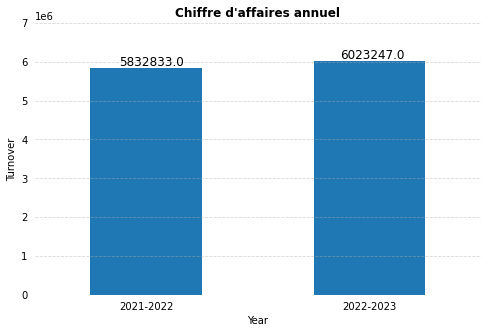

In [51]:
# Visualisation


plt.figure(figsize = (8,5))
plt.grid(axis = 'y', alpha = 0.5, ls ='--')
plt.box(False)
plt.tick_params(bottom=False, left=False)

plt.bar(sales_year.year, sales_year.price, width = 0.5)

plt.text(-0.12,5900000,round(sales_year.price[0],0),fontsize=12)
plt.text(0.87,6070000,round(sales_year.price[1],0),fontsize=12)

plt.xlabel('Year')
plt.ylabel('Turnover')
plt.ylim(0, 7000000)
plt.xlim(-0.5,1.5)
plt.title("Chiffre d'affaires annuel", fontweight = 'bold');

print("Le chiffre d'affaire a augmenté de {}% en 2022-2023 par rapport à l'année précédante."
      .format(round((sales_year.price[1]-sales_year.price[0])*100/sales_year.price[0],2)))

### Évolution du chiffre d'affaires

In [52]:
# Chiffre d'affaires mensuel

sales_month = transaction_product[['date','price','session_id']].groupby(pd.Grouper(key = 'date', freq = "m")).agg({'price':sum, 'session_id': 'count'}).reset_index()
sales_month.head()

,date,price,session_id
0,2021-03-31,482536.37,28610
1,2021-04-30,476258.26,28457
2,2021-05-31,493028.59,28293
3,2021-06-30,484163.04,26857
4,2021-07-31,482877.96,24742


Le chiffre d'affaire semble stable avec une chute visible en octobre 2021 qui s'est vite remédiée dès le mois suivant. Il y a eu une chute apparente au dernier mois.


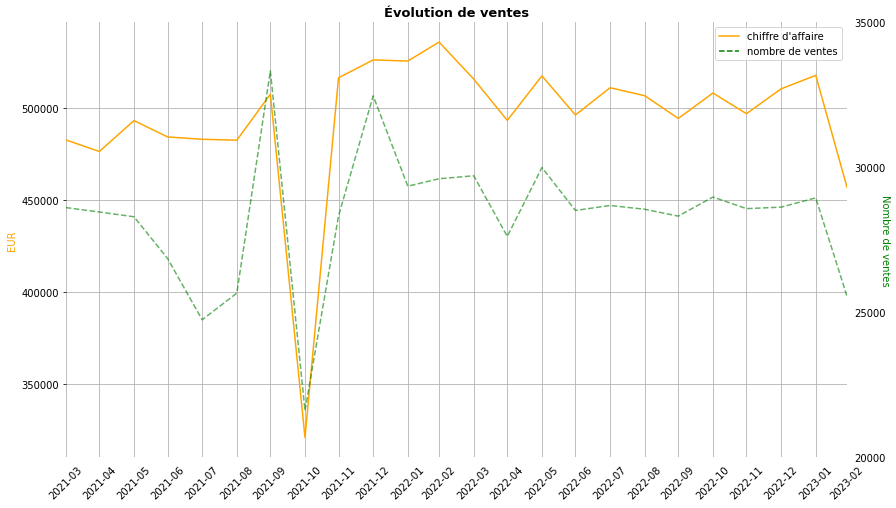

In [53]:
# Visualisation de chiffre d'affaires mensuel

fig = plt.figure(figsize=(14,8))


ax1 = fig.add_subplot(111)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.grid('whitegrid')
xtick = sales_month['date'].apply(lambda x: x.strftime('%Y-%m')) 
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 

ax1.plot(sales_month.date, sales_month.price, color = 'orange', label ="chiffre d'affaire")

ax1.set_yticks(np.arange(300000, 600000, 50000))
ax1.set_ylabel("EUR", color = "orange")
ax1.set_xticks(sales_month['date'])
ax1.set_xticklabels(xtick, rotation = 45)
ax1.set_xlim(sales_month['date'][0],sales_month['date'][23])


ax2 = ax1.twinx()
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)

ax2.plot(sales_month.date, sales_month.session_id, color = 'green', ls ='--', alpha = 0.6)
ax1.plot(np.nan, color = 'green', label ="nombre de ventes", ls ='--')
ax1.legend()

ax2.set_yticks(np.arange(20000, 40000, 5000))
ax2.set_ylabel("Nombre de ventes", rotation = 270, color ='green')
ax2.yaxis.set_ticks_position('none') 


plt.title("Évolution de ventes", fontsize = 13, fontweight = 'bold');

print("Le chiffre d'affaire semble stable avec une chute visible en octobre 2021 qui s'est vite remédiée dès le mois suivant. Il y a eu une chute apparente au dernier mois.")

In [54]:
# Moyenne mobile

sales_month['moving_average'] = sales_month.loc[:,'price'].rolling(window = 3).mean()
sales_month.head()

,date,price,session_id,moving_average
0,2021-03-31,482536.37,28610,NaN
1,2021-04-30,476258.26,28457,NaN
2,2021-05-31,493028.59,28293,483941.073333
3,2021-06-30,484163.04,26857,484483.296667
4,2021-07-31,482877.96,24742,486689.863333


Le chiffre d'affaire est en tendance à la baisse progressive depuis janvier 2022.


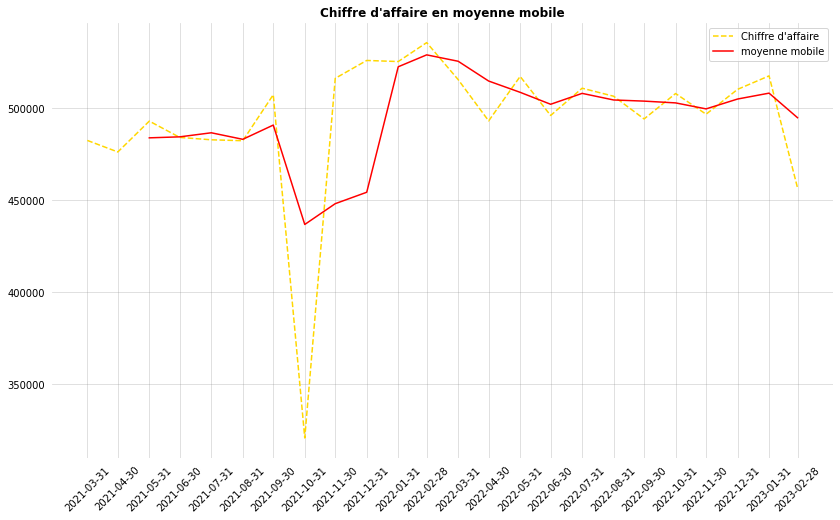

In [55]:
# Visualisation

plt.figure(figsize=(14,8))
plt.grid('whitegrid', color ='gray', alpha = 0.3)

plt.plot(sales_month.date, sales_month.price, ls = '--', color = 'gold', label = "Chiffre d'affaire")
plt.plot(sales_month.date, sales_month.moving_average, color = 'red', label = 'moyenne mobile')

plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.xticks(sales_month.date, rotation = 45)
plt.legend()
plt.title("Chiffre d'affaire en moyenne mobile", fontweight = 'bold');

print("Le chiffre d'affaire est en tendance à la baisse progressive depuis janvier 2022.")

### Chiffre d'affaires par catégorie

In [56]:
# Chiffre d'affaires categorie

sales_category = transaction_product[['date','price','categ','id_prod']].groupby([pd.Grouper(key = 'date', freq = "m"),'categ','id_prod']).sum('price').reset_index()
sales_category.head()

,date,categ,id_prod,price
0,2021-03-31,0.0,0_0,150.00
1,2021-03-31,0.0,0_1,186.83
2,2021-03-31,0.0,0_10,35.90
3,2021-03-31,0.0,0_1000,129.96
4,2021-03-31,0.0,0_1001,104.79


Les proportions de chaque catégorie sont à peu près homogènes avec la catégorie 2 visiblement minoritaire de 13-15% par rapport à deux autres.


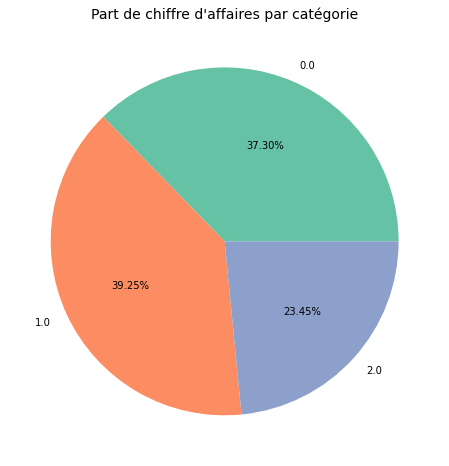

In [57]:
# Visualisation

sales_category_prop = sales_category[['categ','price']].groupby('categ').sum('price').reset_index()

plt.figure(figsize = (8,8))
plt.pie(sales_category_prop.price, labels = sales_category_prop.categ, colors = sns.set_palette('Set2'), 
        autopct = '%.2f%%')
plt.title("Part de chiffre d'affaires par catégorie", fontsize = 14);

print('Les proportions de chaque catégorie sont à peu près homogènes avec la catégorie 2 visiblement minoritaire de 13-15% par rapport à deux autres.')

In [58]:
# Évolution du chiffre d'affaires par categorie 

sales_category_pivot = pd.pivot_table(data = sales_category[['date','categ','price']].groupby(['date','categ']).sum('price').reset_index(), 
                                      columns = 'categ', index = 'date')
sales_category_pivot.head()

price                      
categ             0.0        1.0        2.0
date                                       
2021-03-31  193724.93  186974.17  101837.27
2021-04-30  205371.42  156138.35  114748.49
2021-05-31  196271.84  165893.40  130863.35
2021-06-30  168017.63  189162.04  126983.37
2021-07-31  144793.35  188523.27  149561.34

Il y a une chute significative du chiffre d'affaire de la catégorie 1 au mois d'octobre 2021.


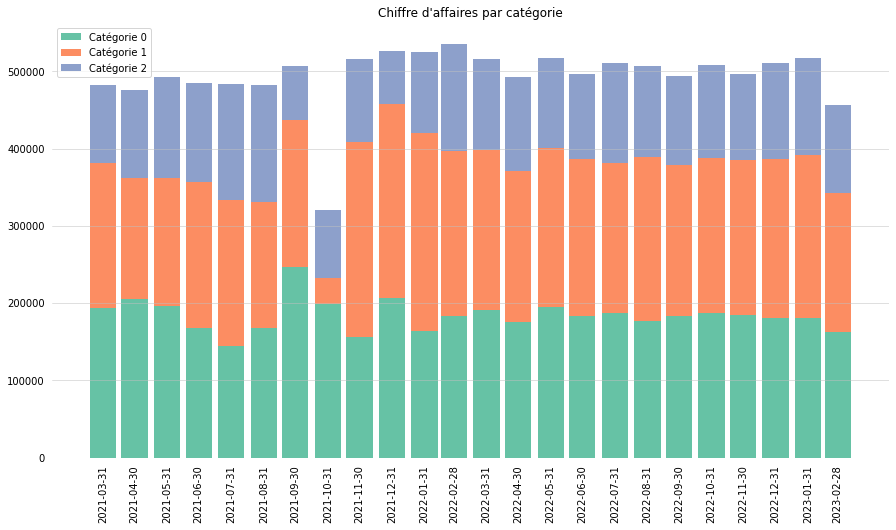

In [59]:
# Visualisation

plt.figure(figsize = (15,8))
plt.grid(axis = 'y', color='silver', linewidth = 0.5)

plt.bar(sales_category_pivot.index, sales_category_pivot.price[0], width = 25, align = 'center', label = 'Catégorie 0')
plt.bar(sales_category_pivot.index, sales_category_pivot.price[1], width = 25, align = 'center', 
        bottom = sales_category_pivot.price[0], label = 'Catégorie 1')
plt.bar(sales_category_pivot.index, sales_category_pivot.price[2], width = 25, align = 'center', 
        bottom = sales_category_pivot.price[0]+sales_category_pivot.price[1], label = 'Catégorie 2')

plt.box(False)
plt.xticks(sales_category_pivot.index, rotation=90)
plt.tick_params(bottom=False, left=False)
plt.title("Chiffre d'affaires par catégorie")
plt.legend();

print("Il y a une chute significative du chiffre d'affaire de la catégorie 1 au mois d'octobre 2021.")

### Zoom sur octobre 2021

In [60]:
# Vérification événement du mois d'octobre

import datetime as dt

transaction_oct21 = transaction_product[(transaction_product.date > dt.datetime(2021, 9, 30)) &
                                        (transaction_product.date < dt.datetime(2021, 11, 1))]
transaction_oct21  = transaction_oct21.groupby([pd.Grouper(key = 'date', freq = "d"),'categ']).count().reset_index()

pivot_oct21 = transaction_oct21.pivot_table(transaction_oct21, index ='date', columns = 'categ')
pivot_oct21.head()

client_id              id_prod               price               \
categ            0.0    1.0   2.0     0.0    1.0   2.0    0.0    1.0   2.0   
date                                                                         
2021-09-30     950.0  342.0  19.0   950.0  342.0  19.0  950.0  342.0  19.0   
2021-10-01     663.0  344.0  38.0   663.0  344.0  38.0  663.0  344.0  38.0   
2021-10-02     661.0    NaN  28.0   661.0    NaN  28.0  661.0    NaN  28.0   
2021-10-03     648.0    NaN  31.0   648.0    NaN  31.0  648.0    NaN  31.0   
2021-10-04     603.0    NaN  38.0   603.0    NaN  38.0  603.0    NaN  38.0   

           session_id               
categ             0.0    1.0   2.0  
date                                
2021-09-30      950.0  342.0  19.0  
2021-10-01      663.0  344.0  38.0  
2021-10-02      661.0    NaN  28.0  
2021-10-03      648.0    NaN  31.0  
2021-10-04      603.0    NaN  38.0

Nous observons un problème d'enregistrement de ventes des produits de catégorie 1 du 2 au 27 octobre.


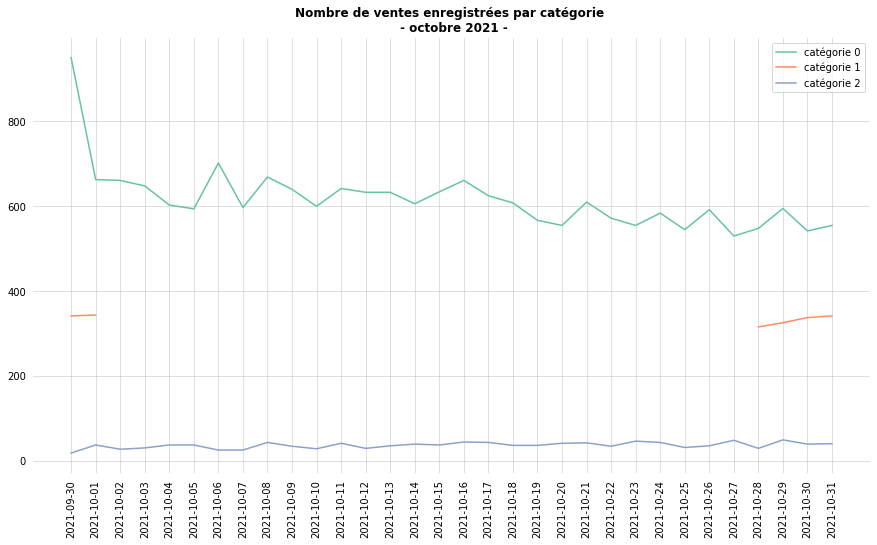

In [61]:
# Visualisation

print("Nous observons un problème d'enregistrement de ventes des produits de catégorie 1 du 2 au 27 octobre.")

plt.figure(figsize = (15,8))
plt.grid(color='silver', linewidth = 0.5)

plt.plot(pivot_oct21.index, pivot_oct21.price[0], label = 'catégorie 0')
plt.plot(pivot_oct21.index, pivot_oct21.price[1], label = 'catégorie 1')
plt.plot(pivot_oct21.index, pivot_oct21.price[2], label = 'catégorie 2')

plt.box(False)
plt.tick_params(left=False, bottom = False)
plt.xticks(pivot_oct21.index, rotation = 90)
plt.title("Nombre de ventes enregistrées par catégorie \n - octobre 2021 -", fontweight = 'bold')
plt.legend();

<h2><span style = 'color:indianred'> 5. Suppression octobre 2021 </span></h2>

In [62]:
transaction_product = transaction_product.drop(transaction_product[(transaction_product.date > dt.datetime(2021, 9, 30)) 
                                                                   & (transaction_product.date < dt.datetime(2021, 11, 1))].index)

<h2><span style = 'color:indianred'>6. Analyse des indicateurs de vente</span></h2>

In [63]:
# Chiffre d'affaire global

ca_total = int(transaction_product.price.sum())

print("Le chiffre d'affaires global des ventes en ligne des deux dernières années est de {} euros"
      .format(ca_total))

Le chiffre d'affaires global des ventes en ligne des deux dernières années est de 11517078 euros


In [64]:
sales_year = transaction_product[['date','price']].groupby(pd.Grouper(key = 'date', freq = "m")).sum('price').reset_index()
sales_year = sales_year.drop(sales_year[(sales_year.date == dt.datetime(2021,10,31)) | 
                            (sales_year.date == dt.datetime(2022,10,31))].index)
sales_year['year'] = pd.cut(sales_year.date, labels = ['2021-2022', '2022-2023'],
                            bins = [datetime.datetime.strptime("2021-02-28", "%Y-%m-%d"),
                                    datetime.datetime.strptime("2022-02-28", "%Y-%m-%d"),
                                    datetime.datetime.strptime("2023-02-28", "%Y-%m-%d")])
sales_year = sales_year[['year', 'price']].groupby('year').sum('price').reset_index()
sales_year.head()

,year,price
0,2021-2022,5493831.74
1,2022-2023,5515222.98


<div class = 'alert alert-info'> 
    L'année 2021-2022 correspond à la période de mars 2021 - février 2022. L'année 2022-2023 correspond à la période de mars 2022 - février 2023.
</div>

Le chiffre d'affaire a augmenté de 0.39% en 2022-2023 par rapport à l'année précédante.


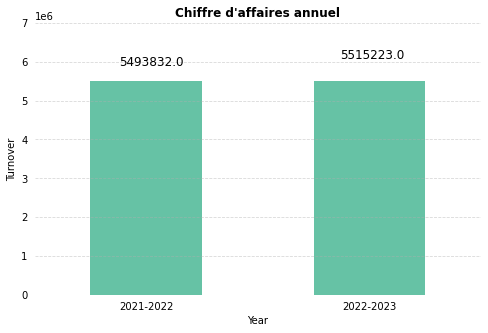

In [65]:
# Visualisation


plt.figure(figsize = (8,5))
plt.grid(axis = 'y', alpha = 0.5, ls ='--')
plt.box(False)
plt.tick_params(bottom=False, left=False)

plt.bar(sales_year.year, sales_year.price, width = 0.5)

plt.text(-0.12,5900000,round(sales_year.price[0],0),fontsize=12)
plt.text(0.87,6070000,round(sales_year.price[1],0),fontsize=12)

plt.xlabel('Year')
plt.ylabel('Turnover')
plt.ylim(0, 7000000)
plt.xlim(-0.5,1.5)
plt.title("Chiffre d'affaires annuel", fontweight = 'bold');

print("Le chiffre d'affaire a augmenté de {}% en 2022-2023 par rapport à l'année précédante."
      .format(round((sales_year.price[1]-sales_year.price[0])*100/sales_year.price[0],2)))

### Chiffre d'affaires par catégorie

In [66]:
# Chiffre d'affaires categorie

sales_category = transaction_product[['date','price','categ','id_prod']].groupby([pd.Grouper(key = 'date', freq = "m"),'categ','id_prod']).sum('price').reset_index()
sales_category.head()

,date,categ,id_prod,price
0,2021-03-31,0.0,0_0,150.00
1,2021-03-31,0.0,0_1,186.83
2,2021-03-31,0.0,0_10,35.90
3,2021-03-31,0.0,0_1000,129.96
4,2021-03-31,0.0,0_1001,104.79


Les proportions de chaque catégorie sont à peu près homogènes avec la catégorie 2 visiblement minoritaire de 13-15% par rapport à deux autres.


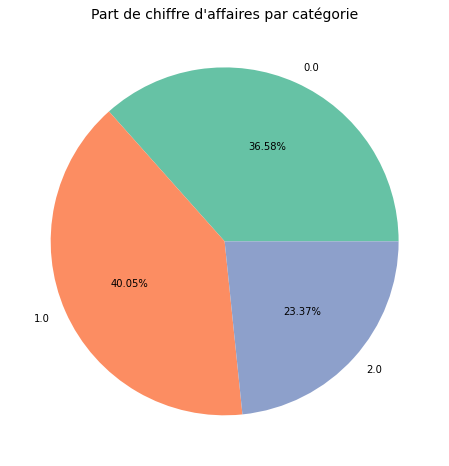

In [67]:
# Visualisation

sales_category_prop = sales_category[['categ','price']].groupby('categ').sum('price').reset_index()

plt.figure(figsize = (8,8))
plt.pie(sales_category_prop.price, labels = sales_category_prop.categ, colors = sns.set_palette('Set2'), 
        autopct = '%.2f%%')
plt.title("Part de chiffre d'affaires par catégorie", fontsize = 14);

print('La catégorie 1 est visiblement majoritaire par rapport à deux autres.')

### Meilleures ventes vs. pires ventes

In [68]:
# Meilleures ventes

top_sales = sales_category[['id_prod','categ','price']].groupby(['id_prod','categ']).sum('price').sort_values('price', ascending = False).reset_index()
top_sales

,id_prod,categ,price
0,2_159,2.0,92265.68
1,2_135,2.0,67403.23
2,2_112,2.0,62772.53
3,2_102,2.0,58962.58
4,2_209,2.0,55292.10
...,...,...,...
3259,0_643,0.0,1.98
3260,0_1653,0.0,1.98
3261,0_1284,0.0,1.38
3262,0_898,0.0,1.27


Les meilleures ventes sont les livres de catégorie 1 et 2.


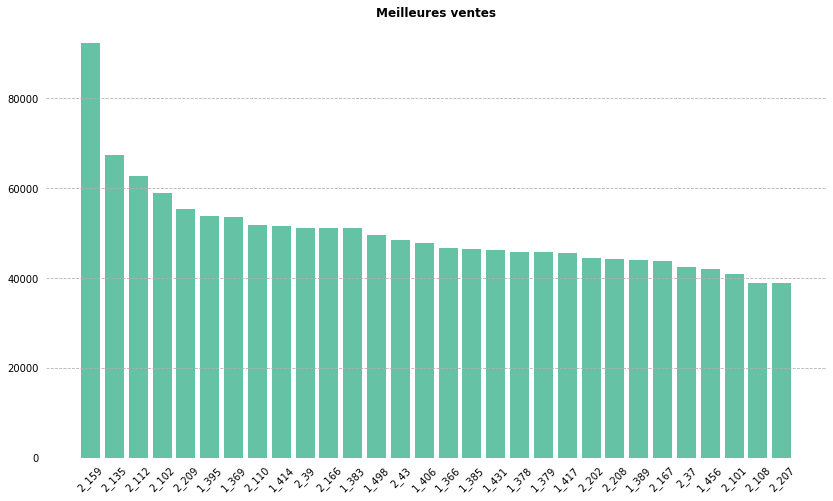

In [69]:
# Visualisation

plt.figure(figsize = (14,8))
plt.grid(axis = 'y', ls='--')

plt.bar(top_sales.head(30).id_prod, top_sales.head(30).price)

plt.box(False)
plt.xticks(rotation = 45)
plt.tick_params(bottom=False, left=False)
plt.title('Meilleures ventes', fontweight = 'bold');

print("Les meilleures ventes sont les livres de catégorie 1 et 2.")

Les livres qui ne se vendent pas bien sont de catégorie 0.


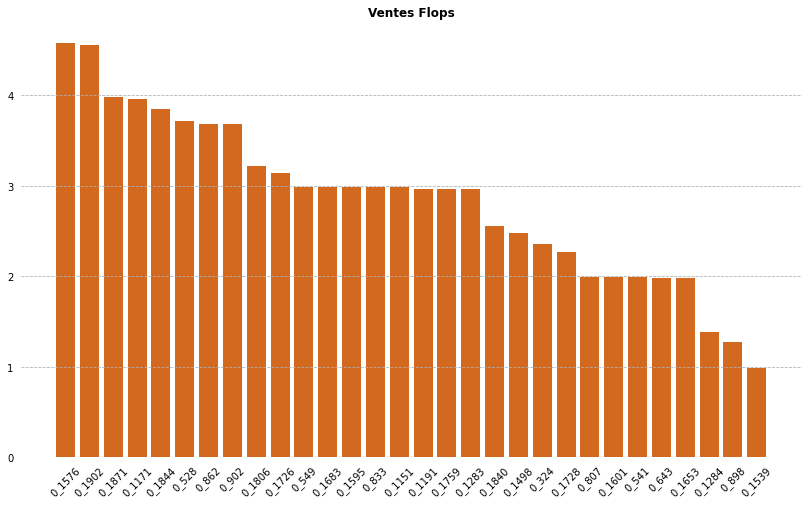

In [70]:
# Visualisation

plt.figure(figsize = (14,8))
plt.grid(axis = 'y', ls='--')

plt.bar(top_sales.tail(30).id_prod, top_sales.tail(30).price, color ='chocolate')

plt.box(False)
plt.xticks(rotation = 45)
plt.tick_params(bottom=False, left=False)
plt.title('Ventes Flops', fontweight = 'bold');

print('Les livres qui ne se vendent pas bien sont de catégorie 0.')

<h2><span style = 'color:indianred'>7. Analyse des clients</span></h2>

### Création de table transaction - produit - client

In [71]:
transaction_product.shape, customer.shape

((656415, 6), (8621, 3))

In [72]:
# Fusion de table transaction, produit, client

tpc = pd.merge(transaction_product, customer, on = 'client_id')
tpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656415 entries, 0 to 656414
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     656415 non-null  object        
 1   date        656415 non-null  datetime64[ns]
 2   session_id  656415 non-null  object        
 3   client_id   656415 non-null  object        
 4   price       656415 non-null  float64       
 5   categ       656415 non-null  float64       
 6   sex         656415 non-null  object        
 7   birth       656415 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 45.1+ MB


In [73]:
# Vérification des doublons

tpc.duplicated().sum()

0

In [74]:
# Aperçu des données

tpc.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986


### Profil clients

In [75]:
# Ajout d'information âge

tpc['age'] = 2023 - tpc['birth']
tpc['age_group'] = pd.cut(tpc.age, [10, 19, 29, 39, 49, 59, 69, 79, 89, 99], 
                          labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])
tpc.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,age_group
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37,30-39
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986,37,30-39
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986,37,30-39
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986,37,30-39
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986,37,30-39


In [76]:
# Âge est genre clients

tpc[['sex','age']].describe()

,age
count,656415.000000
mean,45.223112
std,13.617622
min,19.000000
25%,36.000000
50%,43.000000
75%,53.000000
max,94.000000


L'âge moyen des clients en ligne est 45.2 ans et nous avons autant de femmes que d'hommes.


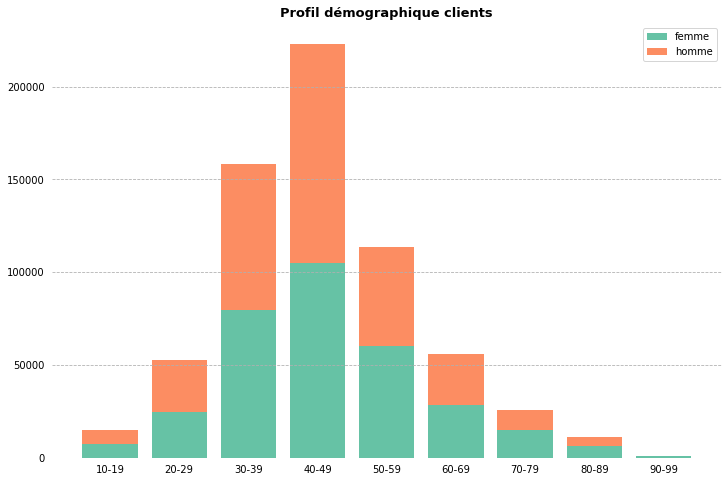

In [77]:
# Visualisation

print("L'âge moyen des clients en ligne est {} ans et nous avons autant de femmes que d'hommes.".format(round(tpc.age.mean(),1)))

age_femme = tpc[tpc.sex == 'f'].age_group.value_counts(sort=False)
age_homme = tpc[tpc.sex == 'm'].age_group.value_counts(sort=False)

plt.figure(figsize = (12,8))
plt.grid(axis = 'y', ls = '--')
plt.box(False)
plt.tick_params(bottom = False, left= False)

plt.bar(x = age_femme.index, height = age_femme, label = 'femme', color = sns.set_palette('Set2'))
plt.bar(x = age_homme.index, height = age_homme, label = 'homme', bottom = age_femme, color = sns.set_palette('Set2'))
plt.legend()
plt.title('Profil démographique clients', fontsize = 13, fontweight = 'bold');

In [78]:
# Répartition chiffre d'affaire

customer_turnover = tpc[['client_id','price']].groupby('client_id').sum('price').sort_values('price')
customer_turnover['lorenz'] = customer_turnover.price.cumsum()/customer_turnover.price.sum()
customer_turnover.head()

,price,lorenz
client_id,,
c_8140,8.30,7.206689e-07
c_8114,9.98,1.587208e-06
c_240,11.06,2.547521e-06
c_4648,11.20,3.519990e-06
c_2793,12.99,4.647880e-06


Les 50% de nos clients génère 20% de chiffre d'affaires et les autres 50% génère 80% de chiffre d'affaires.


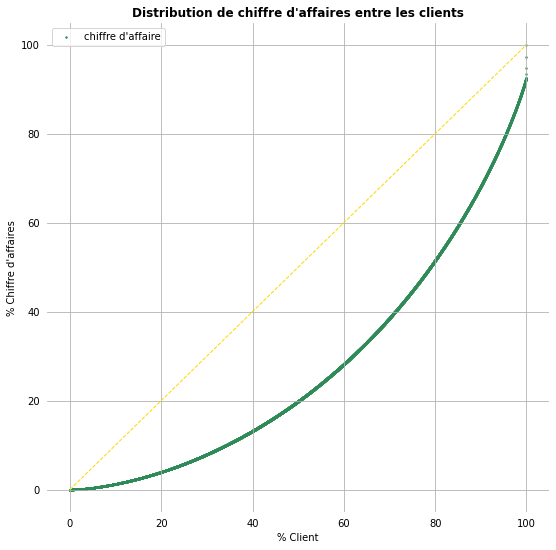

In [79]:
# Visualisation

plt.figure(figsize=(9,9))
plt.grid('whitegrid')
plt.box(False)
plt.tick_params(bottom = False, left = False)


plt.scatter(np.arange(len(customer_turnover.lorenz))*100/len(customer_turnover.lorenz),
            customer_turnover.lorenz*100, s = 2, label = "chiffre d'affaire", color = 'seagreen')
plt.plot(np.arange(0,101), np.arange(0,101), '--', color = 'gold', linewidth = 1)

plt.legend()
plt.xlabel('% Client')
plt.ylabel("% Chiffre d'affaires")
plt.title("Distribution de chiffre d'affaires entre les clients", fontweight ='bold');

print("Les 50% de nos clients génère 20% de chiffre d'affaires et les autres 50% génère 80% de chiffre d'affaires.")

### Lien genre client - catégorie livre

In [80]:
# Répartition de genre entre les catégories des livres

gen_cat = pd.crosstab(tpc.sex, tpc.categ, margins = True)
gen_cat.head()

categ,0.0,1.0,2.0,All
sex,,,,
f,196643,113927,16712,327282
m,199318,111234,18581,329133
All,395961,225161,35293,656415


Nous n'observons pas de lien entre le genre de clients et la catégorie de livres achetés.


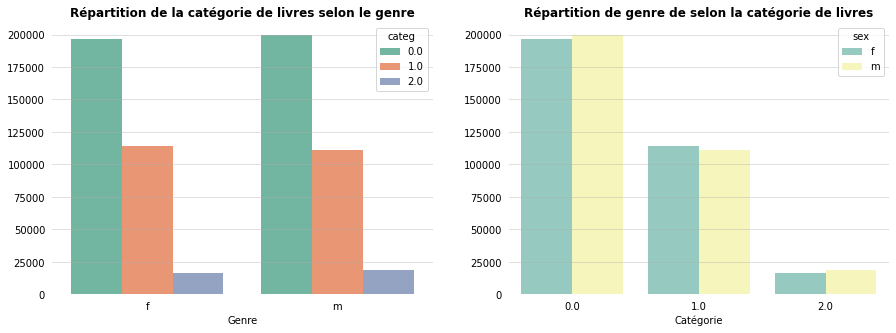

In [81]:
# Visualisation

fig = plt.figure (figsize = (15,5))

ax1 = fig.add_subplot(121)

ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.grid(axis = 'y', alpha = 0.5)
sns.countplot(x = 'sex', hue = 'categ', data = tpc)
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
plt.xlabel('Genre')
plt.ylabel('')
plt.title('Répartition de la catégorie de livres selon le genre', fontweight = 'bold')

ax2 = fig.add_subplot(122)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)
sns.countplot(x = 'categ', hue = 'sex', data = tpc, palette ='Set3')
ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none') 
plt.xlabel('Catégorie')
plt.ylabel('')
plt.title('Répartition de genre de selon la catégorie de livres', fontweight = 'bold');

print("Nous n'observons pas de lien entre le genre de clients et la catégorie de livres achetés.")

In [82]:
## Test Chi2
from scipy import stats

chi_2, p, df, expected = stats.chi2_contingency(gen_cat)

print("chi2:", chi_2)
print("p-valeur", p)
print("Le lien entre le genre et la catégorie de livre est significatif.")

chi2: 144.0383194139693
p-valeur 1.4073478695426263e-28
Le lien entre le genre et la catégorie de livre est significatif.


### Lien âge client - montant panier

In [83]:
# Montant panier de chaque client

age_panier = tpc[['session_id', 'price', 'age','age_group']].groupby('session_id').agg({'price':sum, 'age':min, 'age_group':min}).reset_index()
age_panier.head()

,session_id,price,age,age_group
0,s_1,11.99,56,50-59
1,s_10,26.99,53,50-59
2,s_100,33.72,45,40-49
3,s_1000,39.22,34,30-39
4,s_10000,41.49,34,30-39


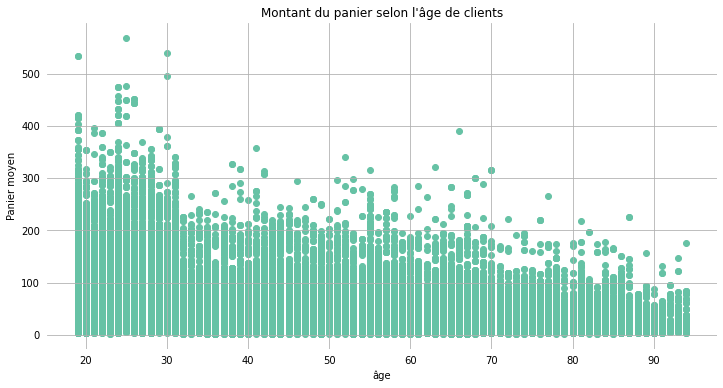

In [84]:
# Visualisation

plt.figure (figsize = (12,6))
plt.box(False)
plt.tick_params(bottom = False, left = False)
plt.grid('whitegrid')

plt.scatter('age', 'price', data = age_panier)

plt.xlabel('âge')
plt.ylabel('Panier moyen')
plt.title("Montant du panier selon l'âge de clients");

In [85]:
# Correlation de pearson

stats.pearsonr(age_panier.age, age_panier.price)

(-0.33021050655659046, 0.0)

Le montant de panier est plus elevé chez les clients moins de 30 ans et reste très stable dans le reste du groupe d'âge. Tous les groupe présentent des outliers assez importants.


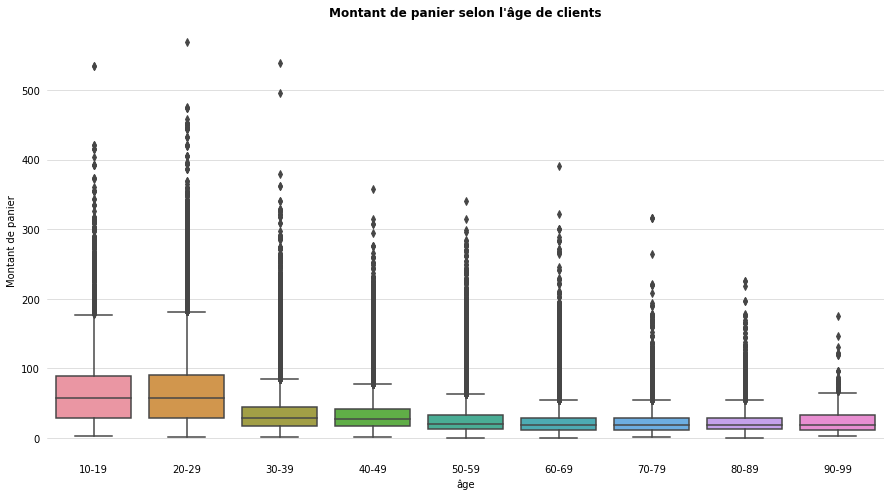

In [86]:
# Visualisation

plt.figure(figsize = (15,8))
plt.grid(axis = 'y', color='silver', linewidth = 0.5)
plt.box(False)
plt.tick_params(bottom = False, left = False)

sns.boxplot(x = 'age_group', y = 'price', data = age_panier)

plt.xlabel('âge')
plt.ylabel('Montant de panier')
plt.title("Montant de panier selon l'âge de clients", fontweight = 'bold');

print("Le montant de panier est plus elevé chez les clients moins de 30 ans et reste très stable dans le reste du groupe d'âge. Tous les groupe présentent des outliers assez importants.")

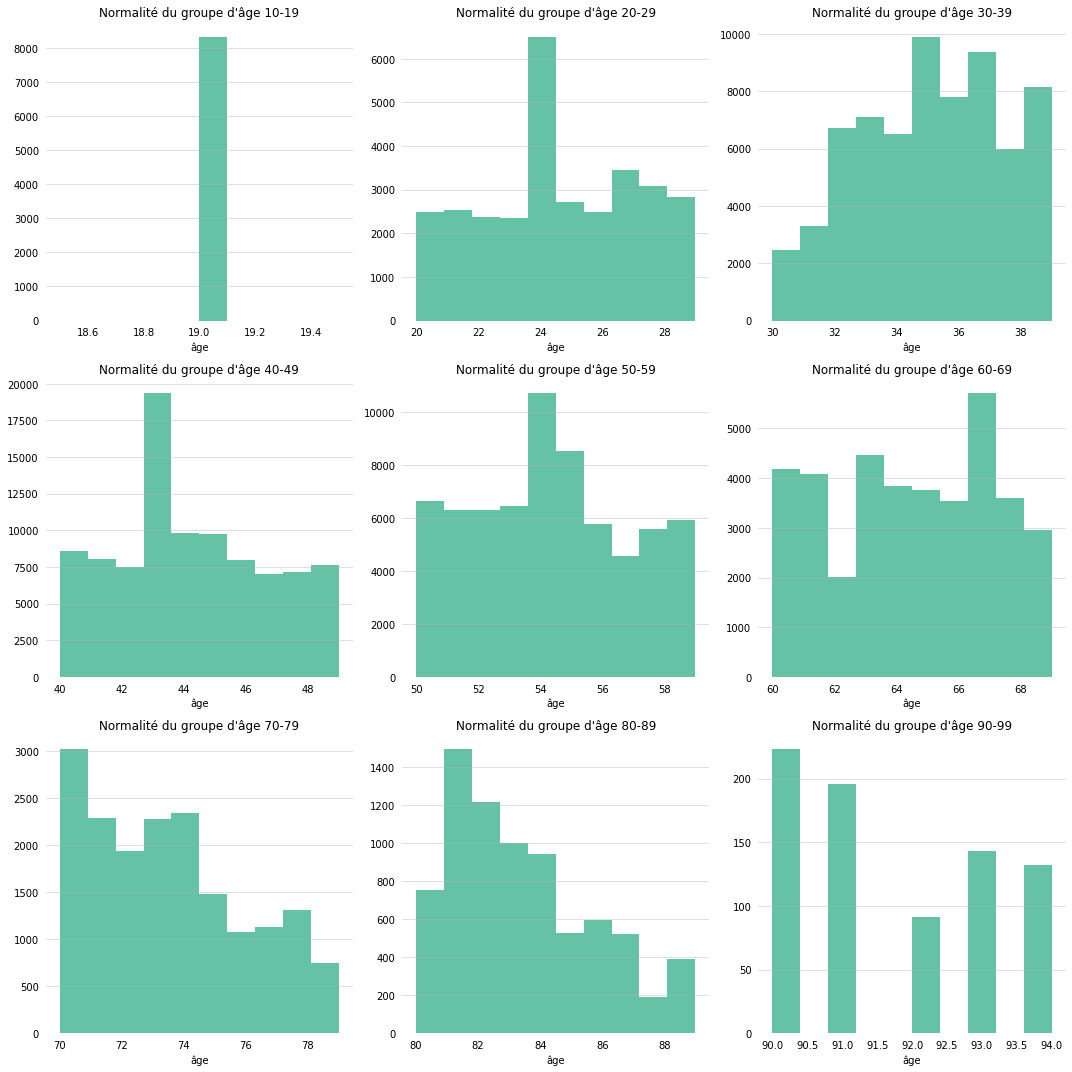

In [87]:
# Visualsiation de normalité

fig = plt.figure (figsize = (15,15))


ax1 = fig.add_subplot(331)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[age_panier.age <= 19]['age'])

ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
plt.title("Normalité du groupe d'âge 10-19")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(332)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 20) &  (age_panier.age <= 29)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 20-29")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(333)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 30) &  (age_panier.age <= 39)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 30-39")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(334)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 40) &  (age_panier.age <= 49)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 40-49")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(335)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 50) &  (age_panier.age <= 59)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 50-59")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(336)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 60) &  (age_panier.age <= 69)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 60-69")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(337)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 70) &  (age_panier.age <= 79)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 70-79")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(338)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 80) &  (age_panier.age <= 89)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 80-89")
plt.xlabel('âge')
plt.ylabel('')


ax2 = fig.add_subplot(339)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

plt.hist(age_panier[(age_panier.age >= 90) &  (age_panier.age <= 99)]['age'])

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Normalité du groupe d'âge 90-99")
plt.xlabel('âge')
plt.ylabel('')
fig.tight_layout();

In [88]:
# Test de normalité

g_10 = age_panier[age_panier.age <= 19]['age']
g_20 = age_panier[(age_panier.age >= 20) &  (age_panier.age <= 29)]['age']
g_30 = age_panier[(age_panier.age >= 30) &  (age_panier.age <= 39)]['age']
g_40 = age_panier[(age_panier.age >= 40) &  (age_panier.age <= 49)]['age']
g_50 = age_panier[(age_panier.age >= 50) &  (age_panier.age <= 59)]['age']
g_60 = age_panier[(age_panier.age >= 60) &  (age_panier.age <= 69)]['age']
g_70 = age_panier[(age_panier.age >= 70) &  (age_panier.age <= 79)]['age']
g_80 = age_panier[(age_panier.age >= 80) &  (age_panier.age <= 89)]['age']
g_90 = age_panier[(age_panier.age >= 90) &  (age_panier.age <= 99)]['age']

age_group = [g_10, g_20, g_30, g_40, g_50, g_60, g_70, g_80, g_90]
group_name = ['g_10', 'g_20', 'g_30', 'g_40', 'g_50', 'g_60', 'g_70', 'g_80', 'g_90']

for i, j in zip (age_group, group_name) :
    print( j)
    print(stats.shapiro(i))

g_10
ShapiroResult(statistic=1.0, pvalue=1.0)
g_20
ShapiroResult(statistic=0.9458171129226685, pvalue=0.0)
g_30
ShapiroResult(statistic=0.9509564638137817, pvalue=0.0)
g_40
ShapiroResult(statistic=0.9453654885292053, pvalue=0.0)
g_50
ShapiroResult(statistic=0.9471709132194519, pvalue=0.0)
g_60
ShapiroResult(statistic=0.9339603185653687, pvalue=0.0)
g_70
ShapiroResult(statistic=0.9251323938369751, pvalue=0.0)
g_80
ShapiroResult(statistic=0.9209386110305786, pvalue=0.0)
g_90
ShapiroResult(statistic=0.8575458526611328, pvalue=4.919645370046914e-26)


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [89]:
# test kruskal

g_10 = age_panier[age_panier.age_group == '10-19']['price']
g_20 = age_panier[age_panier.age_group == '20-29']['price']
g_30 = age_panier[age_panier.age_group == '30-39']['price']
g_40 = age_panier[age_panier.age_group == '40-49']['price']
g_50 = age_panier[age_panier.age_group == '50-59']['price']
g_60 = age_panier[age_panier.age_group == '60-69']['price']
g_70 = age_panier[age_panier.age_group == '70-79']['price']
g_80 = age_panier[age_panier.age_group == '80-89']['price']
g_90 = age_panier[age_panier.age_group == '90-99']['price']

k_stat, p_value = stats.kruskal(g_10, g_20, g_30, g_40, g_50, g_60, g_70, g_80, g_90)

print("p-valeur : ", p_value)
print("Le lien entre le montant du panier et l'âge des clients est significatif.")

p-valeur :  0.0
Le lien entre le montant du panier et l'âge des clients est significatif.


### Lien âge client - montant panier moyen

In [90]:
# Panier moyen

age_panier_moyen = tpc[['session_id','client_id','price','age','age_group']].groupby(['client_id', 'session_id']).agg({'price':sum, 'age':min, 'age_group':min}).reset_index()
age_panier_moyen = age_panier_moyen[['client_id','price','age','age_group']].groupby('client_id').agg({'price':'mean', 'age':'min', 'age_group':'min'}).reset_index()
age_panier_moyen.head()

,client_id,price,age,age_group
0,c_1,17.193438,68,60-69
1,c_10,39.811765,67,60-69
2,c_100,50.970000,31,30-39
3,c_1000,24.284835,57,50-59
4,c_1001,39.812791,41,40-49


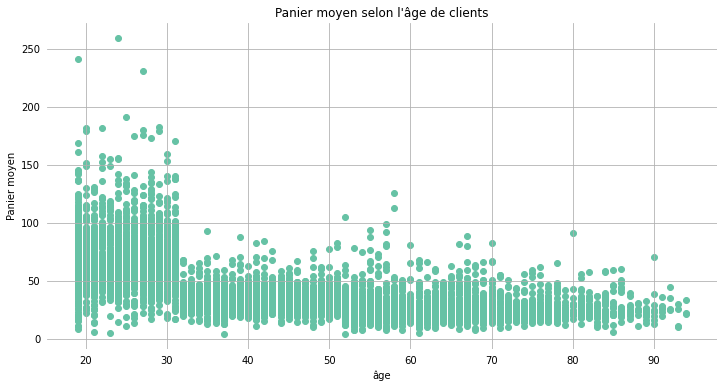

In [91]:
# Visualisation

plt.figure (figsize = (12,6))
plt.box(False)
plt.tick_params(bottom = False, left = False)
plt.grid('whitegrid')

plt.scatter('age', 'price', data = age_panier_moyen)

plt.xlabel('âge')
plt.ylabel('Panier moyen')
plt.title("Panier moyen selon l'âge de clients");

In [92]:
# Correlation de pearson

stats.pearsonr(age_panier_moyen.age, age_panier_moyen.price)

(-0.6099913532737816, 0.0)

Le panier moyen est plus elevé chez les clients moins de 30 ans et reste assez stable dans le reste du groupe d'âge avec une baisse progressive à partir de 30 ans. Tous les groupe présentent des outliers assez importants.


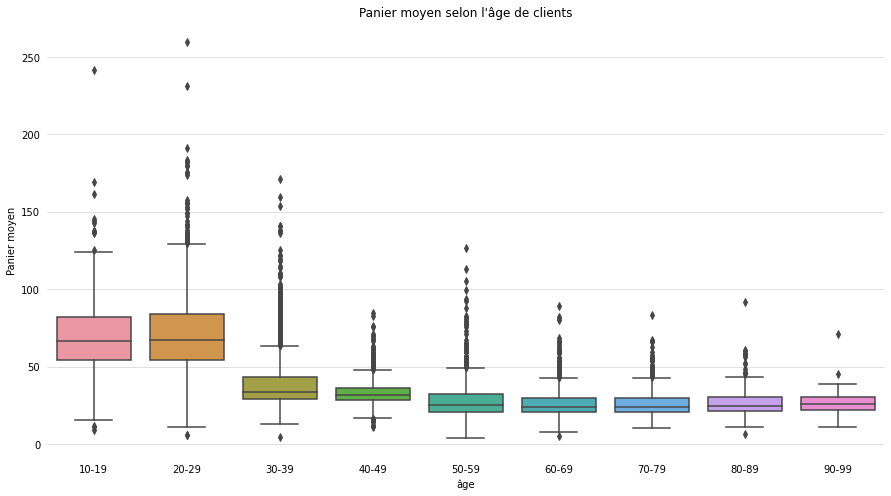

In [93]:
# Visualisation

plt.figure(figsize = (15,8))
plt.grid(axis = 'y', color='silver', linewidth = 0.5)
plt.box(False)
plt.tick_params(bottom = False, left = False)

sns.boxplot(x = 'age_group', y = 'price', data = age_panier_moyen)

plt.xlabel('âge')
plt.ylabel('Panier moyen')
plt.title("Panier moyen selon l'âge de clients");

print("Le panier moyen est plus elevé chez les clients moins de 30 ans et reste assez stable dans le reste du groupe d'âge avec une baisse progressive à partir de 30 ans. Tous les groupe présentent des outliers assez importants.")

In [94]:
# test kruskal

g_10 = age_panier_moyen[age_panier_moyen.age_group == '10-19']['price']
g_20 = age_panier_moyen[age_panier_moyen.age_group == '20-29']['price']
g_30 = age_panier_moyen[age_panier_moyen.age_group == '30-39']['price']
g_40 = age_panier_moyen[age_panier_moyen.age_group == '40-49']['price']
g_50 = age_panier_moyen[age_panier_moyen.age_group == '50-59']['price']
g_60 = age_panier_moyen[age_panier_moyen.age_group == '60-69']['price']
g_70 = age_panier_moyen[age_panier_moyen.age_group == '70-79']['price']
g_80 = age_panier_moyen[age_panier_moyen.age_group == '80-89']['price']
g_90 = age_panier_moyen[age_panier_moyen.age_group == '90-99']['price']

k_stat, p_value = stats.kruskal(g_10, g_20, g_30, g_40, g_50, g_60, g_70, g_80, g_90)

print("p-valeur : ", p_value)
print("Le lien entre le montant du panier moyen et l'âge des clients est significatif.")

p-valeur :  0.0
Le lien entre le montant du panier moyen et l'âge des clients est significatif.


### Lien âge client - fréquence d'achat

In [95]:
# Fréquence d'achat

customer_frequency = tpc[['date','client_id','age','session_id','age_group']].groupby(['client_id', pd.Grouper(key = 'date', freq = "m")]).agg({'session_id':'count', 'age':'min', 'age_group':'min'}).reset_index()
customer_frequency = customer_frequency[['client_id','session_id','age','age_group']].groupby('client_id').agg({'session_id':'count', 'age':'min', 'age_group':'min'}).reset_index()
customer_frequency = customer_frequency.rename(columns = {'session_id':'month_freq'})
customer_frequency['month_freq_group'] = pd.cut(customer_frequency.month_freq,
                                                bins = [0, 5, 15, 25],
                                                labels = ['less than 5','between 5-15',' more than 15'])
customer_frequency.head()

,client_id,month_freq,age,age_group,month_freq_group
0,c_1,16,68,60-69,more than 15
1,c_10,16,67,60-69,more than 15
2,c_100,5,31,30-39,less than 5
3,c_1000,21,57,50-59,more than 15
4,c_1001,19,41,40-49,more than 15


In [96]:
# Table de contingence

customer_frequency_cross = pd.crosstab(customer_frequency.age_group, customer_frequency.month_freq_group, margins = True)
customer_frequency_cross

month_freq_group,less than 5,between 5-15,more than 15,All
age_group,,,,
10-19,48,262,127,437
20-29,194,931,383,1508
30-39,77,581,960,1618
40-49,43,538,1196,1777
50-59,79,554,859,1492
60-69,59,393,576,1028
70-79,33,208,264,505
80-89,8,86,114,208
90-99,3,9,13,25


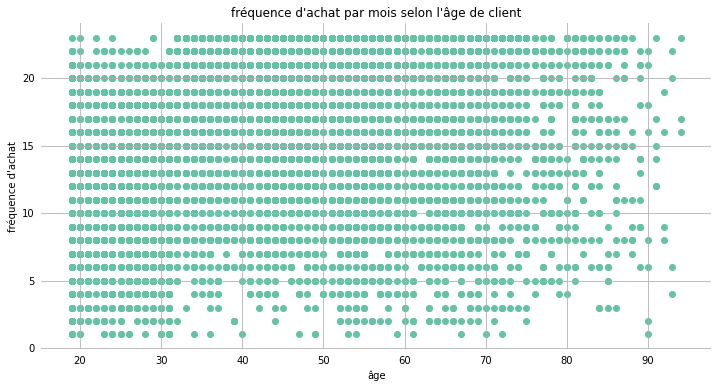

In [97]:
# Visualisation

plt.figure (figsize = (12,6))
plt.box(False)
plt.tick_params(bottom = False, left = False)
plt.grid('whitegrid')

plt.scatter('age', 'month_freq', data = customer_frequency)

plt.xlabel('âge')
plt.ylabel("fréquence d'achat")
plt.title("fréquence d'achat par mois selon l'âge de client");

In [98]:
# Correlation de pearson

stats.pearsonr(customer_frequency.age, customer_frequency.month_freq)

(0.18627005389275755, 5.604517807917164e-68)

La fréquence d'achat est moins élevée chez les clients moins de 30 ans. La fréquence reste assez stable à partir de 30 ans avec une baisse progressive à partir de 50 ans avec grande variabilité chez les plus de 90 ans, probablement à cause de peu de données disponible pour cette tranche d'âge.


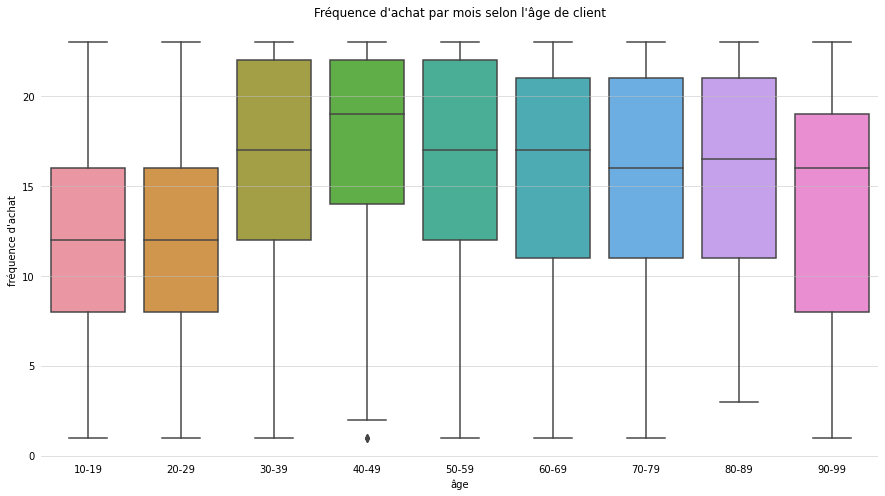

In [99]:
# Visualisation

plt.figure(figsize = (15,8))
plt.box(False)
plt.tick_params(bottom = False, left = False)
plt.grid(axis = 'y', color='silver', linewidth = 0.5)

sns.boxplot(x = 'age_group', y = 'month_freq', data = customer_frequency)

plt.xlabel('âge')
plt.ylabel("fréquence d'achat")
plt.title("Fréquence d'achat par mois selon l'âge de client");

print("La fréquence d'achat est moins élevée chez les clients moins de 30 ans. La fréquence reste assez stable à partir de 30 ans avec une baisse progressive à partir de 50 ans avec grande variabilité chez les plus de 90 ans, probablement à cause de peu de données disponible pour cette tranche d'âge.")

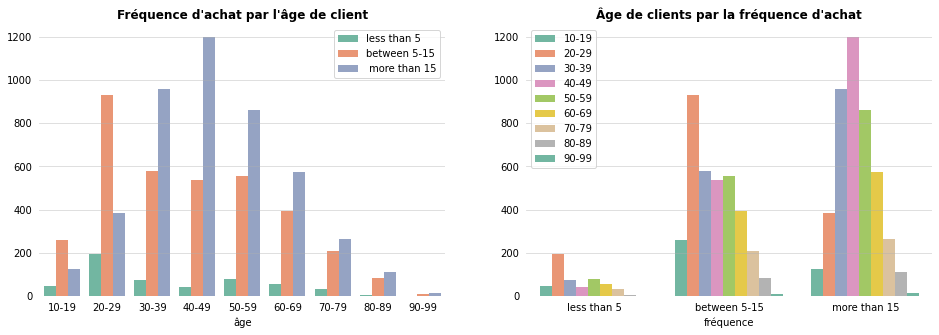

In [100]:
# Visualisation

fig = plt.figure (figsize = (16,5))

ax1 = fig.add_subplot(121)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.grid(axis = 'y', alpha = 0.5)

sns.countplot(x = 'age_group', hue = 'month_freq_group', data = customer_frequency)

ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
plt.title("Fréquence d'achat par l'âge de client", fontweight = 'bold')
plt.xlabel('âge')
plt.ylabel('')
plt.legend()

ax2 = fig.add_subplot(122)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

sns.countplot(x = 'month_freq_group', hue = 'age_group', data = customer_frequency, palette ='Set2')

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Âge de clients par la fréquence d'achat", fontweight = 'bold')
plt.xlabel('fréquence')
plt.ylabel('')
plt.legend();

In [101]:
## Test Chi2


chi_2, p, df, expected = stats.chi2_contingency(customer_frequency_cross)

print("chi2:", chi_2)
print("p-valeur:", p)
print("Le lien entre l'âge et la fréquence d'achat est significatif.")

chi2: 790.2652358108468
p-valeur: 4.326739026469513e-149
Le lien entre l'âge et la fréquence d'achat est significatif.


### Lien âge client - catégorie livre

In [102]:
# Catégorie par âge

age_cat = pd.crosstab(tpc.age_group, tpc.categ, margins = True)
age_cat

categ,0.0,1.0,2.0,All
age_group,,,,
10-19,3276,5661,5813,14750
20-29,10429,20116,22311,52856
30-39,114351,39569,4543,158463
40-49,168606,53802,745,223153
50-59,59384,52920,1010,113314
60-69,23684,31500,534,55718
70-79,11028,14476,209,25713
80-89,4730,6406,120,11256
90-99,473,711,8,1192


Les clients moins de 30 ans achète principalement les livres de catégories 0 et 1. Les clients entre 30 et et 50 ans achètent plus de livres de catégorie 0. À partir de 60 ans, les clients achètent plus de livres de catégorie 1 qui est d'ailleurs présent dans le panier de tous les groupes d'âge.


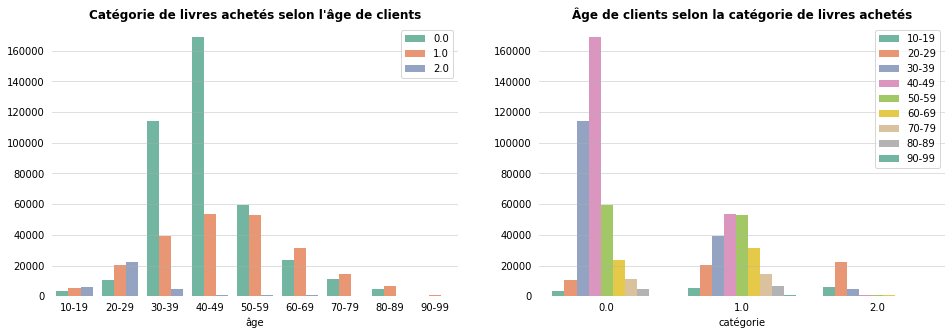

In [103]:
# Visualisation

fig = plt.figure (figsize = (16,5))

ax1 = fig.add_subplot(121)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.grid(axis = 'y', alpha = 0.5)

sns.countplot(x = 'age_group', hue = 'categ', data = tpc)

ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
plt.title("Catégorie de livres achetés selon l'âge de clients", fontweight = 'bold')
plt.xlabel('âge')
plt.ylabel('')
plt.legend()

ax2 = fig.add_subplot(122)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.grid(axis = 'y', alpha = 0.5)

sns.countplot(x = 'categ', hue = 'age_group', data = tpc, palette ='Set2')

ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
plt.title("Âge de clients selon la catégorie de livres achetés", fontweight = 'bold')
plt.xlabel('catégorie')
plt.ylabel('')
plt.legend();

print("Les clients moins de 30 ans achète principalement les livres de catégories 0 et 1. Les clients entre 30 et et 50 ans achètent plus de livres de catégorie 0. À partir de 60 ans, les clients achètent plus de livres de catégorie 1 qui est d'ailleurs présent dans le panier de tous les groupes d'âge.")

In [104]:
# Test Chi2

chi_2, p, df, expected = stats.chi2_contingency(age_cat)

print("chi:", chi_2)
print("p-valeur:", p)
print("Le lien entre l'âge de clients et la catégorie de livres achetés est significatif.")

chi: 251339.13107589874
p-valeur: 0.0
Le lien entre l'âge de clients et la catégorie de livres achetés est significatif.
